In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
def avg_time(wt):
    avg_time = np.mean(wt)
    std_time = np.std(wt)
    return (avg_time, std_time)

In [3]:
# Get all digits from filenames
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

In [4]:
def analyze_case(filenames):
    h5_files = [h5py.File(fn) for fn in filenames]
    all_walltimes = [hf["walltimes"][()] for hf in h5_files]
    average_times = []
    std_times = []
    for wt in all_walltimes:
        time_avg, time_std = avg_time(wt)
        average_times.append(time_avg)
        std_times.append(time_std)
    results = {}
    results["average_times"] = np.array(average_times)
    results["std_times"] = np.array(std_times)
    return results

In [23]:
dir = "../data"
data_files = os.listdir(dir)

thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" not in s]
h5_filenames = [dir + '/' + f for f in thread_files]
print(h5_filenames)

simd_thread_files = [s for s in data_files if "thread_scaling2" in s and "h5" in s]
simd_h5_filenames = [dir + '/' + f for f in simd_thread_files]
print(simd_h5_filenames)

case_two_thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" in s and "simd" not in s]
case_two_h5_filenames = [dir + '/' + f for f in case_two_thread_files]
print(case_two_h5_filenames)

case_two_simd_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "simd" in s]
case_two_simd_h5_filenames = [dir + '/' + f for f in case_two_simd_files]
print(case_two_simd_h5_filenames)

['../data/thread_scaling_8.h5', '../data/thread_scaling_2.h5', '../data/thread_scaling_16.h5', '../data/thread_scaling_4.h5', '../data/thread_scaling_1.h5']
['../data/thread_scaling2_2.h5', '../data/thread_scaling2_16.h5', '../data/thread_scaling2_8.h5', '../data/thread_scaling2_1.h5', '../data/thread_scaling2_4.h5']
['../data/thread_scaling_case_two_1.h5', '../data/thread_scaling_case_two_4.h5', '../data/thread_scaling_case_two_2.h5', '../data/thread_scaling_case_two_8.h5', '../data/thread_scaling_case_two_16.h5']
['../data/thread_scaling_case_two_simd_4.h5', '../data/thread_scaling_case_two_simd_16.h5', '../data/thread_scaling_case_two_simd_1.h5', '../data/thread_scaling_case_two_simd_8.h5', '../data/thread_scaling_case_two_simd_2.h5']


In [24]:
results = analyze_case(h5_filenames)
simd_results = analyze_case(simd_h5_filenames)
case_two_results = analyze_case(case_two_h5_filenames)
case_two_simd_results = analyze_case(case_two_simd_h5_filenames)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


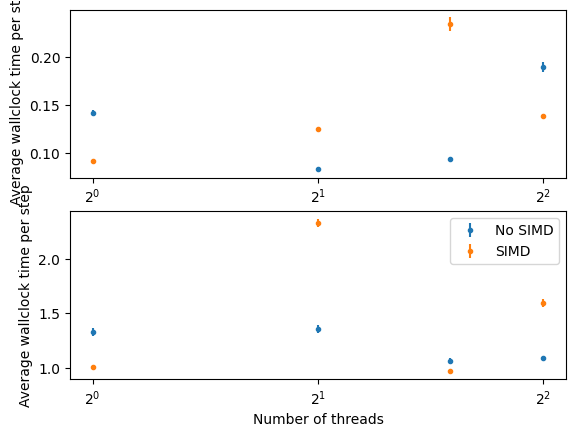

In [29]:
fig, ax = plt.subplots(2, 1)
ax[0].set_xscale('log', base=2)
ax[1].set_xscale('log', base=2)
#ax.set_yscale('log', base=10)

ax[0].errorbar(np.array(range(len(h5_filenames))), results["average_times"], yerr=results["std_times"], \
            linestyle='', marker='.', label="No SIMD")
ax[0].set_xlabel("Number of threads")

ax[0].errorbar(np.array(range(len(simd_h5_filenames))), simd_results["average_times"], yerr=simd_results["std_times"], \
            linestyle='', marker='.', label="SIMD")
plt.legend()

ax[1].errorbar(np.array(range(len(h5_filenames))), case_two_results["average_times"], yerr=case_two_results["std_times"], \
            linestyle='', marker='.', label="No SIMD")
ax[1].set_xlabel("Number of threads")

ax[1].errorbar(np.array(range(len(simd_h5_filenames))), case_two_simd_results["average_times"], yerr=case_two_simd_results["std_times"], \
            linestyle='', marker='.', label="SIMD")

ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Average wallclock time per step")
ax[1].set_ylabel("Average wallclock time per step")
plt.legend()